In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.path as mpath
import matplotlib.patches as mpatches
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'font.size': 12})
#plt.rcParams.update({"font.family": "Verdana"})
#plt.rcParams.update({"text.usetex": True})
#plt.rcParams.update(plt.rcParamsDefault)

plt.rcParams.update({'font.family': 'serif'})

#plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = 'Comic Sans MS'

import networkx as nx

from utils import distance
from utils import CommonFunctions as CF

In [39]:
dynamics = ['Epidemics', 'NoisyVM', 'Regulatory']
dynamics_short = [r'$\mathcal{E}$', r'$\mathcal{R}$', r'$\mathcal{N}$']

dynamics_short_all = [r'$\mathcal{E}$', r'$\mathcal{R}$', r'$\mathcal{N}$', r'$\mathcal{P}$', r'$\mathcal{B}$', r'$\mathcal{V}$', r'$\mathcal{M}$', r'$\mathcal{S}$']

formule = [r'$\dfrac{d x_i}{dt} = -B x_i + R \sum_{j=1}^N A_{ij}(1-x_i)x_j$',
           r'$\dfrac{d x_i}{dt} = -B x_i^a + R \sum_{j=1}^N A_{ij}\dfrac{x_j^h}{1+x_j^h}$',
           r'$\dfrac{d x_i}{dt} = -B x_i + C \tanh x_i + R \sum_{j=1}^N A_{ij} \tanh x_j$',
           r'$\dfrac{d x_i}{dt} = -B x_i^{b} + R \sum_{j=1}^N A_{ij} x_j^a$',
           r'$\dfrac{d x_i}{dt} = F -B x_i - R \sum_{j=1}^N A_{ij} x_i x_j$',
           r'$\dfrac{d x_i}{dt} = F - B x_i + \dfrac{C}{k_i} \sum_{j=1}^N A_{ij} x_j$',
           r'$\dfrac{d x_i}{dt} = B x_i (1-x_i) + R \sum_{j=1}^N A_{ij} x_i \dfrac{x_j^b}{1+x_j^b}$',
           r'$\dfrac{d x_i}{dt} = F + R \sum_{j=1}^N A_{ij} \sin(x_j-x_i)$']

params = [[1, 1], [1, 1], [1, 1, 1, 1]]

times = [1, 5, 20]
cmap = 'Spectral_r'

In [37]:
cmap = 'YlGnBu'

# Generate Network

In [3]:
N = 32
p = 4/N
print(p)
er = nx.erdos_renyi_graph(N, p=p, seed=1)
print(nx.is_connected(er))

mat = nx.to_numpy_array(er)

0.125
True


In [4]:
ax1 = plt.subplot(1,2,1)

nx.draw(er, ax=ax1)

# Compute matrices for various tau

[1, 1]


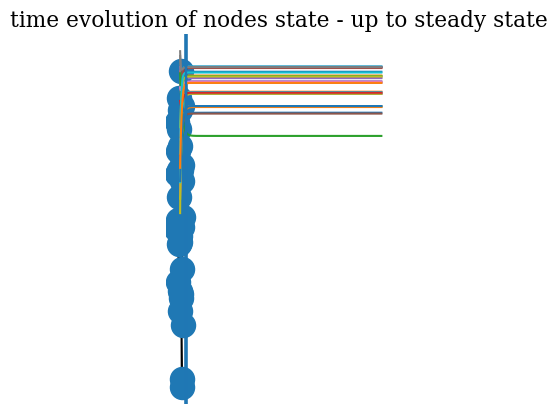

[1, 1]
Normalizing jacobian - $\lambda_{max}$=6.889875123484285



[1, 1]


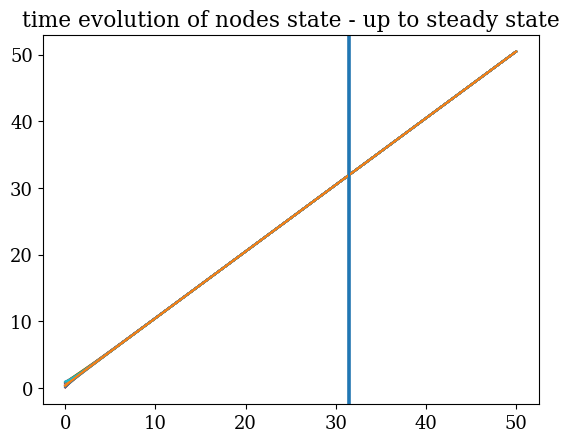

[1, 1]
Normalizing jacobian - $\lambda_{max}$=1.7641432963827568



[1, 1, 1, 1]


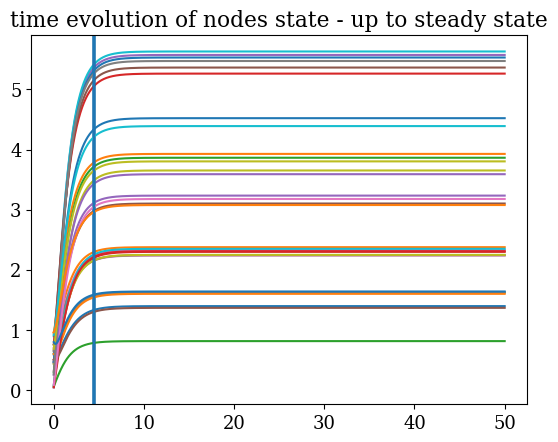

[1, 1, 1, 1]
Normalizing jacobian - $\lambda_{max}$=1.2166996203703235


In [5]:
jacobians = []
avg_dist = []
    
for i, dynamic in enumerate(dynamics):
    N = mat.shape[0]
    
    # Get steady state
    initial_state = np.random.random(N)
    steady_state = CF.Numerical_Integration(mat, dynamic, initial_state, show=True, args=params[i])
        
    # Compute jacobian
    jacobian = CF.Jacobian(mat, dynamic, steady_state[-1], norm=True, args=params[i])
    jacobians.append(jacobian)
    
    ### Compute distance at various tau
    avg = distance.average_distance(jacobian, tmax=None, display=True, return_snapshot=True)
    avg_dist.append(avg)

In [6]:
avg_dist[0][-1].shape

(32, 32, 32)

# Create figure

In [41]:
def draw_bolt(ax, facecolor='gold'):
    Path = mpath.Path
    
    path_data = [
    (Path.MOVETO, (0, 0)),
    (Path.LINETO, (1, 0)),
    (Path.LINETO, (.25, -1)),
    (Path.LINETO, (1.25, -1)),
    (Path.LINETO, (-1, -4)),
    (Path.LINETO, (0, -1.5)),
    (Path.LINETO, (-0.75, -1.5)),
    (Path.LINETO, (0, 0))
    ]
    
    codes, verts = zip(*path_data)
    path = mpath.Path(verts, codes)
    patch = mpatches.PathPatch(path, facecolor=facecolor, ec='k', alpha=1)
    ax.add_patch(patch)

    # plot control points and connecting lines
    x, y = zip(*path.vertices)
    line, = ax.plot(x, y, '-', c='k')

    #ax.grid()
    ax.axis('equal')
    ax.axis('off')

/home/barzon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/home/barzon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/home/barzon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:90: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/home/barzon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:91: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will be

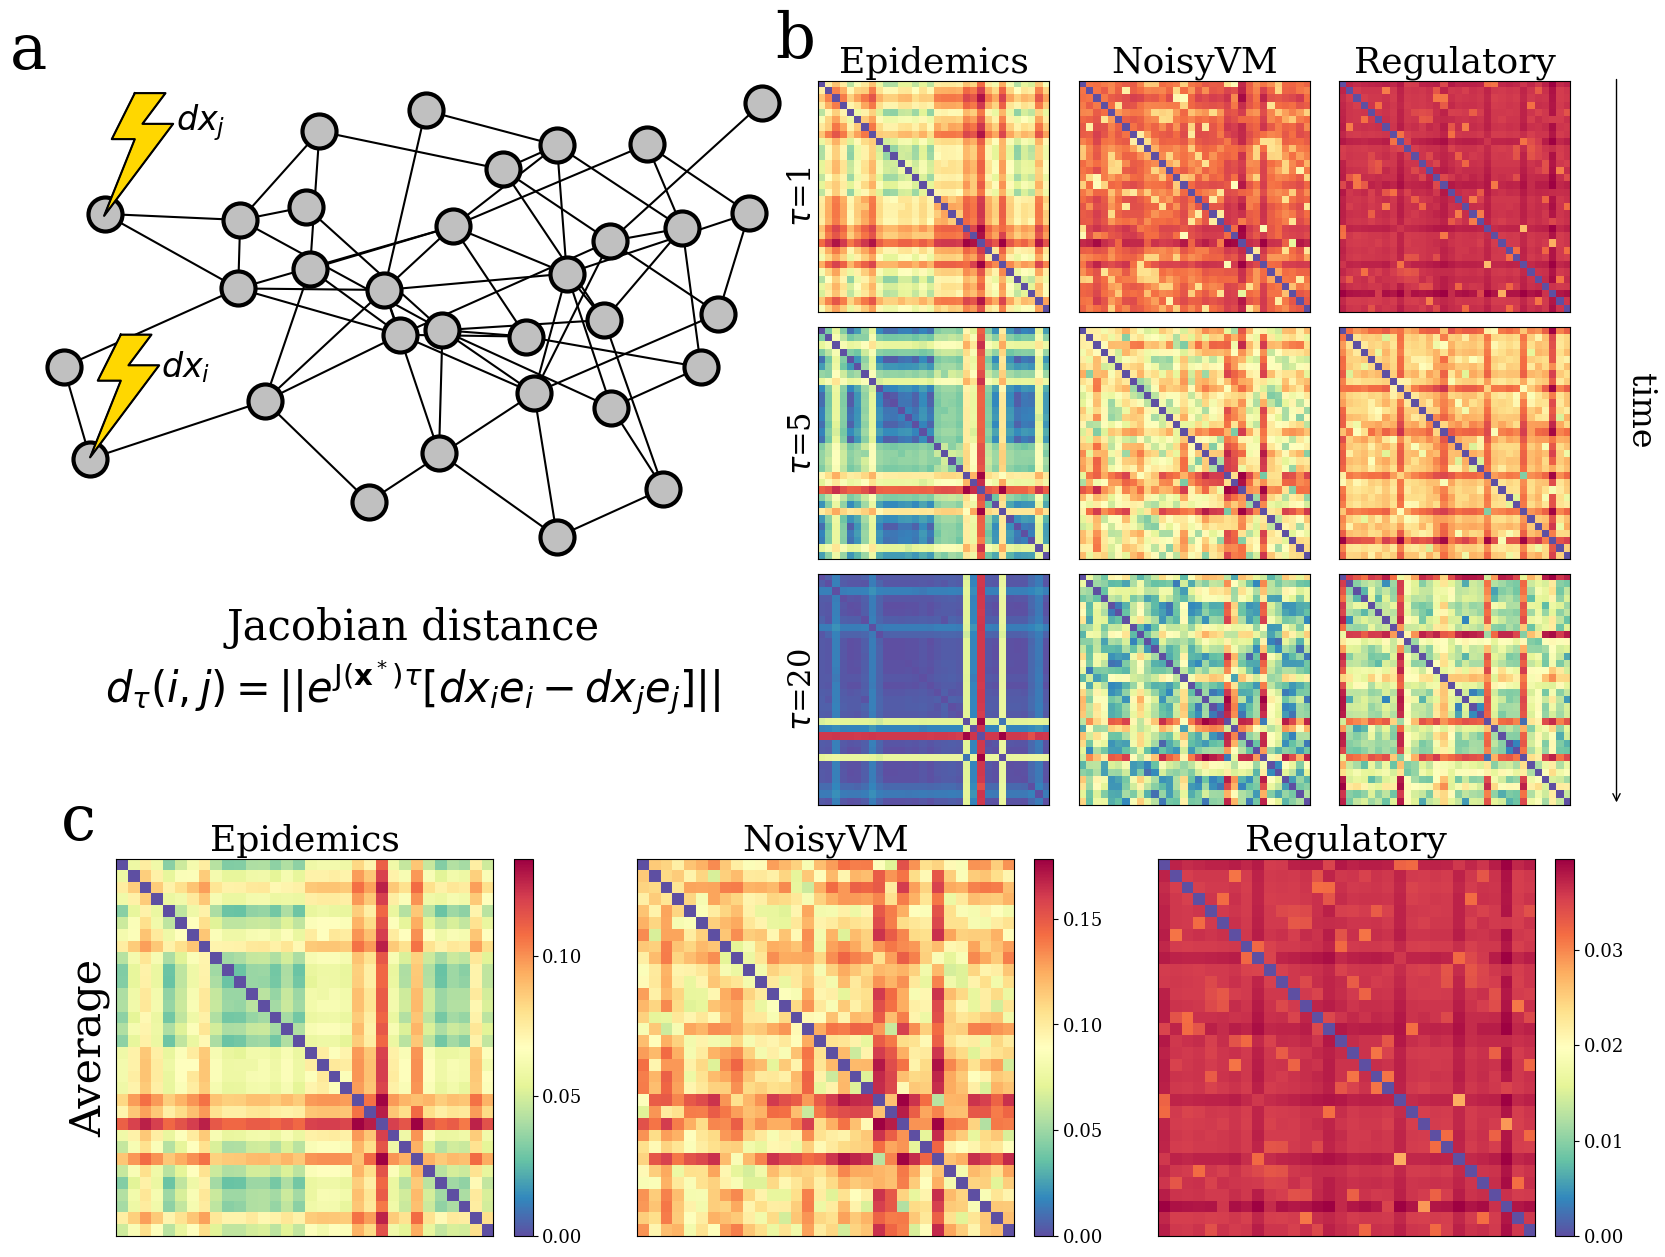

In [42]:
fig = plt.figure(constrained_layout=False, figsize=(20,15))

size_titles = 24
size_scritte = size_titles+4

T = 3

vmin = 0
vmax = np.sqrt(2)

kk = 0.5
gs = GridSpec(2*T+1, 2*T, figure=fig, height_ratios=[1, 1, 1, 0.1, kk, kk, kk])

### Network
ax1 = fig.add_subplot(gs[:T-1,:T])
nx.draw(er, ax=ax1, pos=nx.spring_layout(er, seed=3),
        width=1.5, linewidths=3, edgecolors='k', node_size=600, node_color='silver')

### Add bolts
# Create subplots
size = .09
move_x = 2
move_y = -2

#l1 = .27
#b1 = .84
l1 = .128
b1 = .625
bolt_1 = fig.add_axes([l1, b1, size, size])
draw_bolt(bolt_1)
plt.text(l1+move_x, b1+move_y, r'$dx_i$', ha="center", size=size_titles)

#l2 = .125
#b2 = .6
l2 = .135
b2 = .786
bolt_2 = fig.add_axes([l2, b2, size, size])
draw_bolt(bolt_2)
plt.text(l2+move_x, b2+move_y, r'$dx_j$', ha="center", size=size_titles)

### Add formula Jacobian distance
#jac_dist = r'$\delta_{ij}(\tau) = || \delta_{(i)} \mathbf{x}(\tau) - \delta_{(j)} \mathbf{x}(\tau) ||$'
jac_dist = r'$d_{\tau}(i,j) = || e^{\mathrm{J}(\mathbf{x}^*) \tau} [  dx_i e_{i} -  dx_j e_{j}] ||$'
plt.text(0.5, -0.3, 'Jacobian distance\n'+jac_dist, ha="center", size=size_scritte+2, transform=ax1.transAxes)

### Time evolution
ax_time = []
for idx_i in range(3):
    for idx_j in range(3):
        tmp = fig.add_subplot(gs[idx_i,T+idx_j])
        tmp.imshow(avg_dist[idx_j][-1][times[idx_i]], cmap=cmap)
        if idx_i==0:
            #tmp.set_title(dynamics_short[idx_j], size=26)
            tmp.set_title(dynamics[idx_j], size=size_titles+2)
        if idx_j==0:
            tmp.set_ylabel(r'$\tau$='+str(times[idx_i]), size=size_titles-2, rotation=90, labelpad=0)
        #tmp.axis('off')
        tmp.set_xticks([], [])
        tmp.set_yticks([], [])
        ax_time.append(tmp)
        #ax_time[idx_i,idx_j].axis('off')
        
### Add arrow
xx = 1.2
length = 3.15
tmp.annotate('', xy=(xx, 0), xycoords='axes fraction', xytext=(xx, length),arrowprops=dict(arrowstyle="->", color='k'), transform=tmp.transAxes)
plt.text(xx+0.1, length/2, 'time', ha="center", size=24, transform=tmp.transAxes, rotation=270)

### Formule
'''
tt = [[dynamics_short_all[i], formule[i], dynamics_short_all[i+4], formule[i+4]] for i in range(4)]

ax3 = fig.add_subplot(gs[T:,:2*T])
ax3.axis('off')
#ax3.set_xticks([], [])
#ax3.set_yticks([], [])
prop = 1/6
table = ax3.table(cellText=tt, loc='center', cellLoc='center', colWidths=[0.25*prop,0.25*(1-prop),0.25*prop,0.25*(1-prop)])
table.scale(2, 6)
table.auto_set_font_size(False)
table.set_fontsize(16)
'''

### Average
ax_avg = []
for idx_i in range(3):
    #tmp = fig.add_subplot(gs[idx_i*2:idx_i*2+2,2*T:])
    tmp = fig.add_subplot(gs[T+1:,idx_i*2:idx_i*2+2])
    img = tmp.imshow(avg_dist[idx_i][0], cmap=cmap)
    tmp.set_xticks([], [])
    tmp.set_yticks([], [])
    if idx_i==0:
        #tmp.set_title('Average', size=26, family='sans-serif')
        tmp.set_ylabel('Average', size=size_scritte+3)
    #tmp.set_ylabel(dynamics_short[idx_i], size=26, rotation=0, labelpad=20)
    tmp.set_title(dynamics[idx_i], size=size_titles+2)
    cbar = plt.colorbar(img, ax=tmp, fraction=0.046, pad=0.04)
    cbar.ax.locator_params(nbins=5)
    #cbar.set_label(r'$d_{ij}$', rotation=270, size=22, labelpad=20)
    ax_avg.append(tmp)
#ax4 = fig.add_subplot(gs[:,2*T:])

### Add letters
pos_lett = []
delta_y = 0.05
delta_x = 0.1
plt.text(0, 1+delta_y/2, 'a', ha="center", size=45, transform=ax1.transAxes)
#plt.text(0, 1+delta_y, 'b', ha="center", family='sans-serif', size=40, transform=ax3.transAxes)
plt.text(-delta_x, 1+delta_y*2, 'b', ha="center", size=45, transform=ax_time[0].transAxes)
plt.text(-delta_x, 1+delta_y, 'c', ha="center", size=45, transform=ax_avg[0].transAxes)

#plt.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0.1)
plt.savefig('figures/figure1.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [9]:
import matplotlib.font_manager
flist = matplotlib.font_manager.get_fontconfig_fonts()
names = [matplotlib.font_manager.FontProperties(fname=fname).get_name() for fname in flist]
print(names)

['Liberation Sans', 'DejaVu Sans', 'Liberation Mono', 'Verdana', 'Courier New', 'Arial', 'Ubuntu', 'Comic Sans MS', 'eufm10', 'Bitstream Vera Sans Mono', 'Trebuchet MS', 'Verdana', 'Georgia', 'Courier New', 'Verdana', 'Comic Sans MS', 'Liberation Sans Narrow', 'Liberation Sans Narrow', 'Ubuntu Mono', 'DejaVu Sans', 'DejaVu Sans', 'Arial', 'Andale Mono', 'Courier New', 'Liberation Sans', 'wasy10', 'Verdana', 'Times New Roman', 'Andale Mono', 'Arial Black', 'Courier New', 'Trebuchet MS', 'DejaVu Sans', 'Arial', 'cmmi10', 'Ubuntu', 'DejaVu Serif', 'Georgia', 'Liberation Mono', 'Courier New', 'cmr10', 'Liberation Serif', 'Ubuntu', 'Georgia', 'DejaVu Math TeX Gyre', 'Arial', 'Ubuntu Condensed', 'cmsy10', 'Ubuntu', 'DejaVu Sans', 'Liberation Sans', 'Trebuchet MS', 'msbm10', 'Arial', 'Trebuchet MS', 'Courier New', 'Ubuntu Mono', 'Liberation Serif', 'Trebuchet MS', 'Liberation Sans', 'Arial Black', 'Times New Roman', 'Trebuchet MS', 'Liberation Sans Narrow', 'esint10', 'Ubuntu Mono', 'Bitstrea

# Old

/home/barzon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/home/barzon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:54: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/home/barzon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/home/barzon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:84: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will be

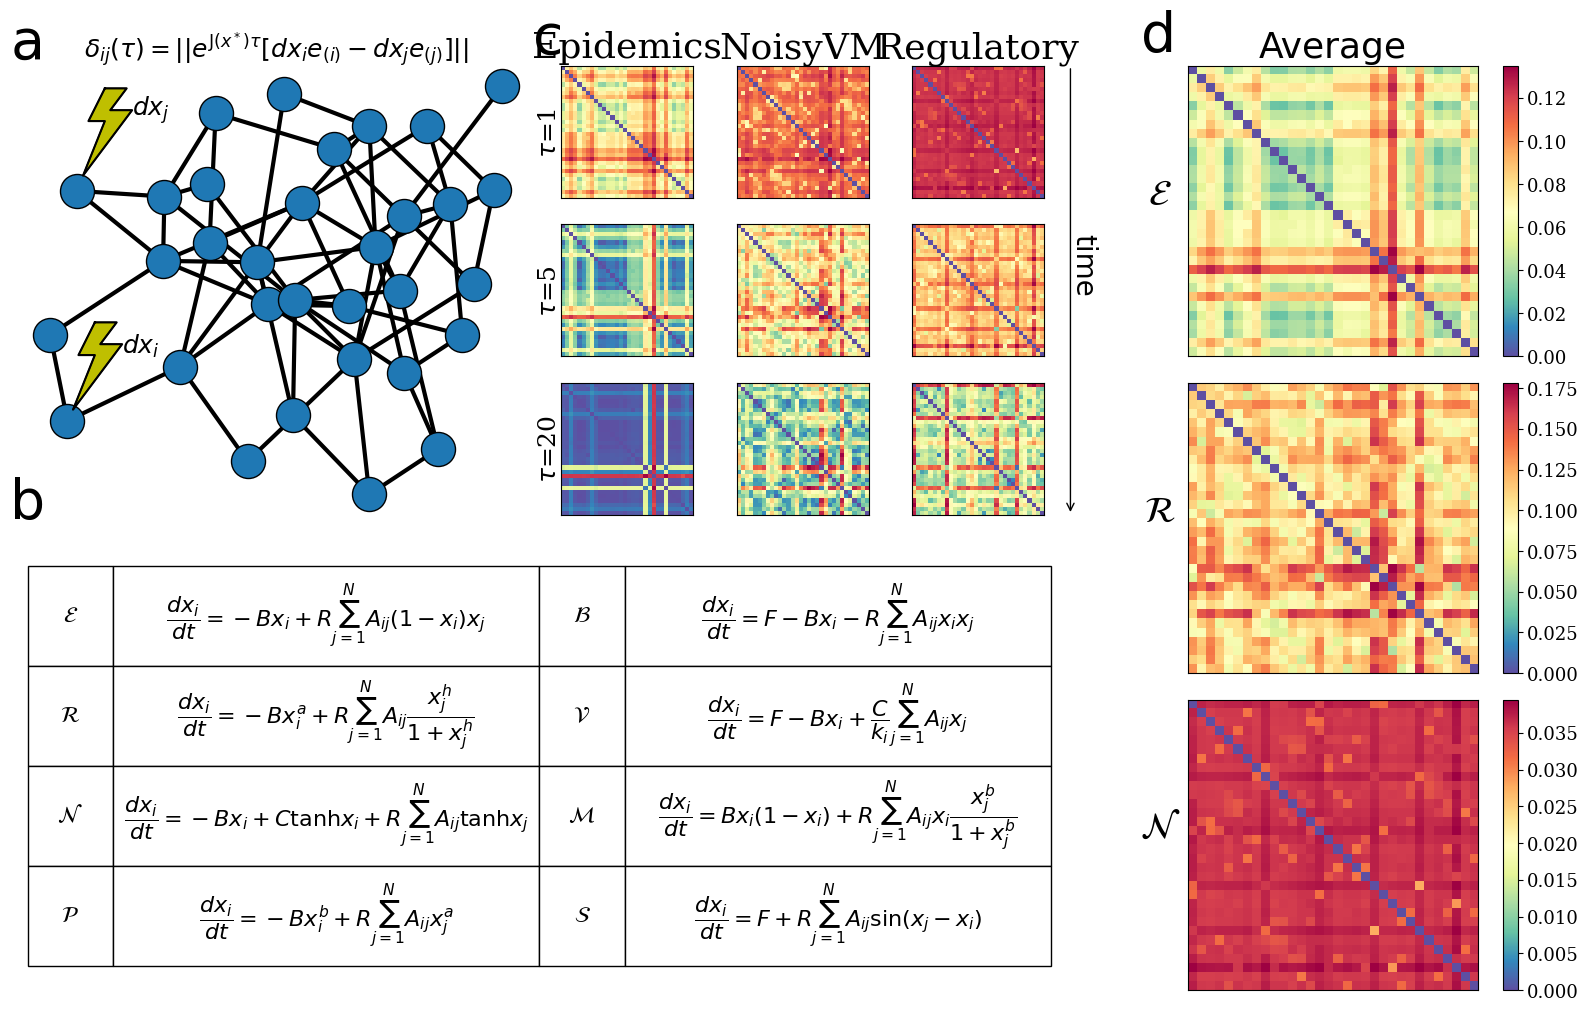

In [10]:
fig = plt.figure(constrained_layout=False, figsize=(20,12))

T = 3

vmin = 0
vmax = np.sqrt(2)

gs = GridSpec(2*T, 3*T, figure=fig)

### Network
ax1 = fig.add_subplot(gs[:T,:T])
nx.draw(er, ax=ax1, pos=nx.spring_layout(er, seed=3), width=3, linewidths=1, edgecolors='k', node_size=600)

### Add bolts
# Create subplots
size = .08
move_x = 2
move_y = -2

#l1 = .27
#b1 = .84
l1 = .12
b1 = .59
bolt_1 = fig.add_axes([l1, b1, size, size])
draw_bolt(bolt_1)
plt.text(l1+move_x, b1+move_y, r'$dx_i$', ha="center", family='sans-serif', size=18)

#l2 = .125
#b2 = .6
l2 = .125
b2 = .785
bolt_2 = fig.add_axes([l2, b2, size, size])
draw_bolt(bolt_2)
plt.text(l2+move_x, b2+move_y, r'$dx_j$', ha="center", family='sans-serif', size=18)

### Add formula Jacobian distance
#jac_dist = r'$\delta_{ij}(\tau) = || \delta_{(i)} \mathbf{x}(\tau) - \delta_{(j)} \mathbf{x}(\tau) ||$'
jac_dist = r'$\delta_{ij}(\tau) = || e^{\mathrm{J}(x^*) \tau} [  dx_i e_{(i)} -  dx_j e_{(j)}] ||$'
plt.text(0.5, 1+0.05/3, jac_dist, ha="center", family='sans-serif', size=18, transform=ax1.transAxes)

### Time evolution
ax_time = []
for idx_i in range(3):
    for idx_j in range(3):
        tmp = fig.add_subplot(gs[idx_i,T+idx_j])
        tmp.imshow(avg_dist[idx_j][-1][times[idx_i]], cmap=cmap)
        if idx_i==0:
            #tmp.set_title(dynamics_short[idx_j], size=26)
            tmp.set_title(dynamics[idx_j], size=26)
        if idx_j==0:
            tmp.set_ylabel(r'$\tau$='+str(times[idx_i]), size=18, rotation=90, labelpad=0)
        #tmp.axis('off')
        tmp.set_xticks([], [])
        tmp.set_yticks([], [])
        ax_time.append(tmp)
        #ax_time[idx_i,idx_j].axis('off')
        
### Add arrow
xx = 1.2
length = 3.4
tmp.annotate('', xy=(xx, 0), xycoords='axes fraction', xytext=(xx, length), 
             arrowprops=dict(arrowstyle="->", color='k'), transform=tmp.transAxes)
plt.text(xx+0.1, length/2, 'time', ha="center", family='sans-serif', size=20, transform=tmp.transAxes, rotation=270)

### Formule
tt = [[dynamics_short_all[i], formule[i], dynamics_short_all[i+4], formule[i+4]] for i in range(4)]

ax3 = fig.add_subplot(gs[T:,:2*T])
ax3.axis('off')
#ax3.set_xticks([], [])
#ax3.set_yticks([], [])
prop = 1/6
table = ax3.table(cellText=tt, loc='center', cellLoc='center', colWidths=[0.25*prop,0.25*(1-prop),0.25*prop,0.25*(1-prop)])
table.scale(2, 6)
table.auto_set_font_size(False)
table.set_fontsize(16)

### Average
ax_avg = []
for idx_i in range(3):
    tmp = fig.add_subplot(gs[idx_i*2:idx_i*2+2,2*T:])
    img = tmp.imshow(avg_dist[idx_i][0], cmap=cmap)
    tmp.set_xticks([], [])
    tmp.set_yticks([], [])
    if idx_i==0:
        tmp.set_title('Average', size=26, family='sans-serif')
    tmp.set_ylabel(dynamics_short[idx_i], size=26, rotation=0, labelpad=20)
    cbar = plt.colorbar(img, ax=tmp)
    #cbar.set_label(r'$d_{ij}$', rotation=270, size=22, labelpad=20)
    ax_avg.append(tmp)
#ax4 = fig.add_subplot(gs[:,2*T:])

### Add letters
pos_lett = []
delta_y = 0.05
delta_x = 0.1
plt.text(0, 1+delta_y/3, 'a', ha="center", family='sans-serif', size=40, transform=ax1.transAxes)
plt.text(0, 1+delta_y, 'b', ha="center", family='sans-serif', size=40, transform=ax3.transAxes)
plt.text(-delta_x, 1+delta_y*2, 'c', ha="center", family='sans-serif', size=40, transform=ax_time[0].transAxes)
plt.text(-delta_x, 1+delta_y, 'd', ha="center", family='sans-serif', size=40, transform=ax_avg[0].transAxes)

plt.tight_layout()
#plt.savefig('figures/figure1.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()